In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

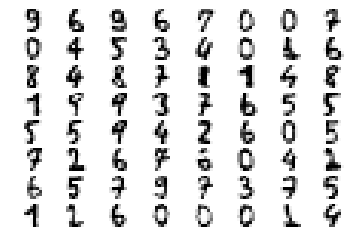

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 40)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []
classes = [[0,2,4,6,8],[0,4,5,8,9],[1,3,4,6,9],[1,2,3,6,7,8,9],[1,4,5,6,7],[1,3,5,7,8],[0,3,4,7,8],[1,2,3,4,5],[0,2,5,7,9],[1,2,5,6,8],[1,2,4,7,9],[0,6,7],[0,2,3],[1,8,9],[0,2,3,4,5,6,7,8,9]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:803
number of class2:814

 ****** Running generation 0 ****** 

Population's average fitness: 0.49610 stdev: 0.06328
Best fitness: 0.67223 - size: (2, 13) - species 2 - id 32
Average adjusted fitness: 0.255
Mean genetic distance 2.945, standard deviation 0.494
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 5.416 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53472 stdev: 0.07055
Best fitness: 0.82189 - size: (3, 14) - species 19 - id 322
Average adjusted fitness: 0.331
Mean genetic distance 2.997, standard deviation 0.475
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 5.752 sec (5.584 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55153 stdev: 0.06895
Best fitness: 0.82189 - size: (3, 14) - species 19 - id 322
Average adjusted fitness: 0.200
Mean genetic distance 2.993, standard deviation 0.483
Population of 201 members in 29 species
Total extincti

Total extinctions: 0
Generation time: 8.029 sec (8.105 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.66465 stdev: 0.11279
Best fitness: 0.85096 - size: (7, 22) - species 32 - id 2847
Average adjusted fitness: 0.194
Mean genetic distance 3.227, standard deviation 0.507
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 7.274 sec (8.156 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65910 stdev: 0.11048
Best fitness: 0.85096 - size: (7, 22) - species 32 - id 2847
Average adjusted fitness: 0.230
Mean genetic distance 3.228, standard deviation 0.500
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 7.514 sec (8.236 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66406 stdev: 0.10765
Best fitness: 0.85096 - size: (7, 22) - species 32 - id 2847
Average adjusted fitness: 0.253
Mean genetic distance 3.240, standard deviation 0.513
Populati

Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.167 sec (6.589 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59726 stdev: 0.09333
Best fitness: 0.79839 - size: (3, 13) - species 35 - id 1234
Average adjusted fitness: 0.246
Mean genetic distance 3.071, standard deviation 0.535
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 6.389 sec (6.567 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59896 stdev: 0.09371
Best fitness: 0.79839 - size: (3, 13) - species 35 - id 1234
Average adjusted fitness: 0.234
Mean genetic distance 3.081, standard deviation 0.526
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 6.684 sec (6.579 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60756 stdev: 0.09174
Best fitness: 0.79839 - size: (3, 13) - species 35 - id 1234
Average adjusted fitness: 0.258
Mean genetic distance 3.

Population of 195 members in 27 species
Total extinctions: 0
Generation time: 7.222 sec (7.057 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.64062 stdev: 0.09604
Best fitness: 0.79839 - size: (3, 13) - species 35 - id 1234
Average adjusted fitness: 0.262
Mean genetic distance 3.186, standard deviation 0.510
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 7.667 sec (7.103 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.65041 stdev: 0.08627
Best fitness: 0.79839 - size: (3, 13) - species 35 - id 1234
Average adjusted fitness: 0.288
Mean genetic distance 3.176, standard deviation 0.529
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 7.519 sec (7.153 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.63530 stdev: 0.09742
Best fitness: 0.79839 - size: (3, 13) - species 35 - id 1234
Average adjusted fitness: 0.273
Mean genetic distance 

Population of 195 members in 40 species
Total extinctions: 0
Generation time: 7.042 sec (6.678 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60939 stdev: 0.07328
Best fitness: 0.75077 - size: (5, 20) - species 19 - id 1959
Average adjusted fitness: 0.185
Mean genetic distance 3.153, standard deviation 0.455
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.834 sec (6.740 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61224 stdev: 0.07575
Best fitness: 0.75077 - size: (5, 20) - species 19 - id 1959
Average adjusted fitness: 0.287
Mean genetic distance 3.163, standard deviation 0.465
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.930 sec (6.788 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61076 stdev: 0.07102
Best fitness: 0.75077 - size: (5, 20) - species 19 - id 1959
Average adjusted fitness: 0.156
Mean genetic distance 

Population of 204 members in 28 species
Total extinctions: 0
Generation time: 7.545 sec (7.508 average)
number of class1:1130
number of class2:487

 ****** Running generation 0 ****** 

Population's average fitness: 0.46161 stdev: 0.15398
Best fitness: 0.80519 - size: (2, 13) - species 4 - id 77
Average adjusted fitness: 0.250
Mean genetic distance 2.869, standard deviation 0.419
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 5.306 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57155 stdev: 0.15526
Best fitness: 0.81756 - size: (3, 14) - species 5 - id 310
Average adjusted fitness: 0.332
Mean genetic distance 2.924, standard deviation 0.441
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 5.661 sec (5.484 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59808 stdev: 0.14482
Best fitness: 0.81756 - size: (3, 14) - species 17 - id 310
Average adjusted fitness: 0.356
Mean

Mean genetic distance 3.136, standard deviation 0.471
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 7.204 sec (7.227 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.69914 stdev: 0.13873
Best fitness: 0.86889 - size: (5, 16) - species 16 - id 3307
Average adjusted fitness: 0.402
Mean genetic distance 3.143, standard deviation 0.478
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.018 sec (7.127 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.69461 stdev: 0.14583
Best fitness: 0.86889 - size: (5, 16) - species 16 - id 3307
Average adjusted fitness: 0.394
Mean genetic distance 3.152, standard deviation 0.485
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 7.467 sec (7.145 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.68735 stdev: 0.14490
Best fitness: 0.86889 - size: (5, 16) - species 16 - id 3307


Total extinctions: 0
Generation time: 6.646 sec (7.667 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60376 stdev: 0.08464
Best fitness: 0.75139 - size: (3, 14) - species 9 - id 238
Average adjusted fitness: 0.222
Mean genetic distance 3.123, standard deviation 0.474
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.715 sec (7.561 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59886 stdev: 0.08674
Best fitness: 0.75139 - size: (3, 14) - species 9 - id 238
Average adjusted fitness: 0.264
Mean genetic distance 3.114, standard deviation 0.482
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.134 sec (7.619 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60114 stdev: 0.08907
Best fitness: 0.75139 - size: (3, 14) - species 9 - id 238
Average adjusted fitness: 0.268
Mean genetic distance 3.127, standard deviation 0.481
Population of 19

Population of 196 members in 32 species
Total extinctions: 0
Generation time: 7.121 sec (7.649 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.65538 stdev: 0.09601
Best fitness: 0.81323 - size: (7, 25) - species 26 - id 1889
Average adjusted fitness: 0.260
Mean genetic distance 3.145, standard deviation 0.500
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.551 sec (7.637 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.65447 stdev: 0.09796
Best fitness: 0.81323 - size: (7, 25) - species 26 - id 1889
Average adjusted fitness: 0.345
Mean genetic distance 3.129, standard deviation 0.502
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 7.434 sec (7.599 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.64440 stdev: 0.09745
Best fitness: 0.81323 - size: (7, 25) - species 26 - id 1889
Average adjusted fitness: 0.305
Mean genetic distance 

Mean genetic distance 3.206, standard deviation 0.488
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 7.182 sec (7.004 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62376 stdev: 0.08419
Best fitness: 0.76562 - size: (6, 19) - species 27 - id 1683
Average adjusted fitness: 0.257
Mean genetic distance 3.219, standard deviation 0.502
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 6.900 sec (7.047 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61648 stdev: 0.08881
Best fitness: 0.76562 - size: (6, 19) - species 27 - id 1683
Average adjusted fitness: 0.249
Mean genetic distance 3.212, standard deviation 0.492
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 6.912 sec (7.008 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61568 stdev: 0.09066
Best fitness: 0.77798 - size: (6, 19) - species 27 - id 2757



 ****** Running generation 0 ****** 

Population's average fitness: 0.51017 stdev: 0.05740
Best fitness: 0.68460 - size: (2, 13) - species 2 - id 144
Average adjusted fitness: 0.155
Mean genetic distance 2.922, standard deviation 0.454
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 6.245 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53738 stdev: 0.06278
Best fitness: 0.69635 - size: (3, 14) - species 5 - id 228
Average adjusted fitness: 0.159
Mean genetic distance 2.954, standard deviation 0.450
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.763 sec (6.504 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55178 stdev: 0.06734
Best fitness: 0.72047 - size: (3, 14) - species 14 - id 488
Average adjusted fitness: 0.172
Mean genetic distance 2.985, standard deviation 0.471
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.584 sec (6.531 a

Population's average fitness: 0.63111 stdev: 0.08389
Best fitness: 0.77737 - size: (7, 23) - species 44 - id 1773
Average adjusted fitness: 0.175
Mean genetic distance 3.219, standard deviation 0.503
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 7.846 sec (8.375 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62823 stdev: 0.08470
Best fitness: 0.77737 - size: (7, 23) - species 44 - id 1773
Average adjusted fitness: 0.190
Mean genetic distance 3.228, standard deviation 0.511
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 7.298 sec (8.339 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62392 stdev: 0.08817
Best fitness: 0.77737 - size: (7, 23) - species 44 - id 1773
Average adjusted fitness: 0.239
Mean genetic distance 3.226, standard deviation 0.508
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 8.157 sec (8.430 average)

 ******

Population's average fitness: 0.57994 stdev: 0.06745
Best fitness: 0.71800 - size: (5, 17) - species 1 - id 1030
Average adjusted fitness: 0.202
Mean genetic distance 3.000, standard deviation 0.495
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 7.113 sec (7.074 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57755 stdev: 0.07427
Best fitness: 0.71800 - size: (5, 17) - species 1 - id 1030
Average adjusted fitness: 0.194
Mean genetic distance 3.003, standard deviation 0.490
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.482 sec (7.115 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58696 stdev: 0.07123
Best fitness: 0.75634 - size: (3, 16) - species 13 - id 1541
Average adjusted fitness: 0.158
Mean genetic distance 3.042, standard deviation 0.481
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 6.945 sec (7.233 average)

 ****** Ru

Population of 199 members in 20 species
Total extinctions: 0
Generation time: 8.041 sec (8.026 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.60731 stdev: 0.08181
Best fitness: 0.75696 - size: (8, 24) - species 23 - id 4427
Average adjusted fitness: 0.196
Mean genetic distance 3.133, standard deviation 0.540
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 9.064 sec (8.048 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.60408 stdev: 0.07857
Best fitness: 0.75696 - size: (8, 24) - species 23 - id 4427
Average adjusted fitness: 0.210
Mean genetic distance 3.134, standard deviation 0.539
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 8.309 sec (8.015 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.60870 stdev: 0.07643
Best fitness: 0.75696 - size: (8, 24) - species 23 - id 4427
Average adjusted fitness: 0.151
Mean genetic distance 

Mean genetic distance 3.161, standard deviation 0.490
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 9.647 sec (8.125 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59595 stdev: 0.07252
Best fitness: 0.73469 - size: (4, 16) - species 2 - id 1858
Average adjusted fitness: 0.137
Mean genetic distance 3.201, standard deviation 0.485
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 7.505 sec (8.178 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60952 stdev: 0.07247
Best fitness: 0.73840 - size: (5, 20) - species 43 - id 2401
Average adjusted fitness: 0.169
Mean genetic distance 3.211, standard deviation 0.485
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 7.234 sec (8.192 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60748 stdev: 0.07702
Best fitness: 0.75510 - size: (6, 23) - species 43 - id 2525
A

Population's average fitness: 0.54056 stdev: 0.07620
Best fitness: 0.80705 - size: (3, 14) - species 5 - id 383
Average adjusted fitness: 0.250
Mean genetic distance 3.034, standard deviation 0.466
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.131 sec (6.662 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55202 stdev: 0.08481
Best fitness: 0.80705 - size: (3, 14) - species 5 - id 383
Average adjusted fitness: 0.259
Mean genetic distance 3.038, standard deviation 0.464
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 6.941 sec (6.755 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56667 stdev: 0.09102
Best fitness: 0.80705 - size: (3, 14) - species 5 - id 383
Average adjusted fitness: 0.238
Mean genetic distance 3.072, standard deviation 0.478
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 6.348 sec (6.653 average)

 ****** Running

Population's average fitness: 0.66538 stdev: 0.10029
Best fitness: 0.82251 - size: (3, 13) - species 43 - id 1504
Average adjusted fitness: 0.248
Mean genetic distance 3.229, standard deviation 0.457
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 7.644 sec (7.903 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65843 stdev: 0.10005
Best fitness: 0.82251 - size: (3, 13) - species 43 - id 1504
Average adjusted fitness: 0.208
Mean genetic distance 3.204, standard deviation 0.472
Population of 189 members in 34 species
Total extinctions: 0
Generation time: 7.450 sec (7.861 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.63860 stdev: 0.11212
Best fitness: 0.82808 - size: (3, 13) - species 43 - id 3251
Average adjusted fitness: 0.342
Mean genetic distance 3.206, standard deviation 0.485
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.337 sec (7.793 average)

 ******

Population's average fitness: 0.58858 stdev: 0.07904
Best fitness: 0.73036 - size: (5, 19) - species 4 - id 1190
Average adjusted fitness: 0.188
Mean genetic distance 3.133, standard deviation 0.490
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 6.681 sec (6.660 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59873 stdev: 0.07642
Best fitness: 0.73036 - size: (5, 19) - species 4 - id 1190
Average adjusted fitness: 0.205
Mean genetic distance 3.114, standard deviation 0.490
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 6.581 sec (6.709 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60092 stdev: 0.07746
Best fitness: 0.73036 - size: (5, 19) - species 4 - id 1190
Average adjusted fitness: 0.216
Mean genetic distance 3.103, standard deviation 0.487
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 7.313 sec (6.850 average)

 ****** Ru

Population's average fitness: 0.62449 stdev: 0.08653
Best fitness: 0.75819 - size: (5, 22) - species 8 - id 3714
Average adjusted fitness: 0.246
Mean genetic distance 3.278, standard deviation 0.505
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 8.778 sec (8.704 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.62913 stdev: 0.08522
Best fitness: 0.75819 - size: (5, 22) - species 8 - id 3714
Average adjusted fitness: 0.250
Mean genetic distance 3.288, standard deviation 0.528
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 7.495 sec (8.658 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.62874 stdev: 0.08411
Best fitness: 0.75819 - size: (5, 22) - species 8 - id 3714
Average adjusted fitness: 0.270
Mean genetic distance 3.292, standard deviation 0.525
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 7.574 sec (8.629 average)

 ****** Ru

Mean genetic distance 3.123, standard deviation 0.455
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 6.923 sec (7.806 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.70182 stdev: 0.10072
Best fitness: 0.82993 - size: (4, 16) - species 33 - id 2283
Average adjusted fitness: 0.397
Mean genetic distance 3.148, standard deviation 0.463
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 7.252 sec (7.684 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68231 stdev: 0.12908
Best fitness: 0.82993 - size: (4, 16) - species 33 - id 2283
Average adjusted fitness: 0.421
Mean genetic distance 3.137, standard deviation 0.462
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 7.273 sec (7.523 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.70487 stdev: 0.10942
Best fitness: 0.82993 - size: (4, 16) - species 33 - id 2283



 ****** Running generation 2 ****** 

Population's average fitness: 0.64851 stdev: 0.10999
Best fitness: 0.79283 - size: (3, 15) - species 14 - id 447
Average adjusted fitness: 0.424
Mean genetic distance 2.976, standard deviation 0.452
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 6.270 sec (5.944 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.65356 stdev: 0.11930
Best fitness: 0.79283 - size: (3, 15) - species 14 - id 447
Average adjusted fitness: 0.356
Mean genetic distance 3.002, standard deviation 0.456
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 6.220 sec (6.013 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65348 stdev: 0.11357
Best fitness: 0.80334 - size: (4, 17) - species 8 - id 826
Average adjusted fitness: 0.365
Mean genetic distance 3.060, standard deviation 0.458
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 6

Generation time: 7.439 sec (7.458 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.68157 stdev: 0.13091
Best fitness: 0.83117 - size: (7, 21) - species 29 - id 3723
Average adjusted fitness: 0.388
Mean genetic distance 3.199, standard deviation 0.528
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 8.061 sec (7.507 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.67837 stdev: 0.13003
Best fitness: 0.83488 - size: (7, 21) - species 29 - id 4175
Average adjusted fitness: 0.392
Mean genetic distance 3.236, standard deviation 0.539
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 7.977 sec (7.583 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.69007 stdev: 0.12229
Best fitness: 0.83673 - size: (8, 23) - species 29 - id 4333
Average adjusted fitness: 0.394
Mean genetic distance 3.235, standard deviation 0.542
Population of 197 members in 

Total extinctions: 0
Generation time: 6.422 sec (6.453 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66528 stdev: 0.10251
Best fitness: 0.78108 - size: (4, 16) - species 22 - id 1505
Average adjusted fitness: 0.368
Mean genetic distance 3.147, standard deviation 0.498
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 6.347 sec (6.508 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.66503 stdev: 0.10425
Best fitness: 0.78108 - size: (4, 16) - species 22 - id 1505
Average adjusted fitness: 0.363
Mean genetic distance 3.163, standard deviation 0.495
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 6.200 sec (6.497 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67458 stdev: 0.09573
Best fitness: 0.78108 - size: (4, 16) - species 22 - id 1505
Average adjusted fitness: 0.377
Mean genetic distance 3.168, standard deviation 0.491
Populati

Population's average fitness: 0.67971 stdev: 0.09541
Best fitness: 0.82004 - size: (9, 25) - species 30 - id 4501
Average adjusted fitness: 0.384
Mean genetic distance 3.175, standard deviation 0.524
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 8.499 sec (8.004 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.68530 stdev: 0.09709
Best fitness: 0.82004 - size: (9, 25) - species 30 - id 4501
Average adjusted fitness: 0.388
Mean genetic distance 3.184, standard deviation 0.523
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 8.100 sec (8.035 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.67619 stdev: 0.09965
Best fitness: 0.82004 - size: (9, 25) - species 30 - id 4501
Average adjusted fitness: 0.378
Mean genetic distance 3.202, standard deviation 0.520
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 8.265 sec (8.140 average)

 ******

Population's average fitness: 0.79838 stdev: 0.21074
Best fitness: 0.92331 - size: (3, 14) - species 5 - id 1683
Average adjusted fitness: 0.701
Mean genetic distance 3.232, standard deviation 0.479
Population of 185 members in 39 species
Total extinctions: 0
Generation time: 7.308 sec (7.201 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.79819 stdev: 0.20647
Best fitness: 0.92331 - size: (3, 14) - species 5 - id 1683
Average adjusted fitness: 0.699
Mean genetic distance 3.211, standard deviation 0.481
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 6.872 sec (7.172 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.78198 stdev: 0.22332
Best fitness: 0.92331 - size: (3, 14) - species 5 - id 1683
Average adjusted fitness: 0.688
Mean genetic distance 3.185, standard deviation 0.479
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 7.333 sec (7.100 average)

 ****** Ru

In [8]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [9]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [10]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [11]:
pred = []
real = []
for i in range(15):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:88/92:class2
Accuracy: 0.7944444444444444
class1:89/91:class2
Accuracy: 0.8055555555555556
class1:93/87:class2
Accuracy: 0.6611111111111111
class1:126/54:class2
Accuracy: 0.8555555555555555
class1:94/86:class2
Accuracy: 0.7611111111111111
class1:91/89:class2
Accuracy: 0.7666666666666667
class1:90/90:class2
Accuracy: 0.7944444444444444
class1:92/88:class2
Accuracy: 0.75
class1:88/92:class2
Accuracy: 0.7888888888888889
class1:89/91:class2
Accuracy: 0.8222222222222222
class1:93/87:class2
Accuracy: 0.7
class1:53/127:class2
Accuracy: 0.7888888888888889
class1:51/129:class2
Accuracy: 0.8277777777777777
class1:54/126:class2
Accuracy: 0.7611111111111111
class1:161/19:class2
Accuracy: 0.8722222222222222


In [12]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [13]:
number_codes = [[1,1,0,0,0,0,1,0,1,0,0,1,1,0,1],
[0,0,1,1,1,1,0,1,0,1,1,0,0,1,0],
[1,0,0,1,0,0,0,1,1,1,1,0,1,0,1],
[0,0,1,1,0,1,1,1,0,0,0,0,1,0,1],
[1,1,1,0,1,0,1,1,0,0,1,0,0,0,1],
[0,1,0,0,1,1,0,1,1,1,0,0,0,0,1],
[1,0,1,1,1,0,0,0,0,1,0,1,0,0,1],
[0,0,0,1,1,1,1,0,1,0,1,1,0,0,1],
[1,1,0,1,0,1,1,0,0,1,0,0,0,1,1],
[0,1,1,1,0,0,0,0,1,0,1,0,0,1,1]]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(15):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(15 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        list_P.append(i[0][1])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.7055555555555556

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  0  0  0  0  0  0  1  0  0]
 [ 0  7  0  3  0  1  1  0  0  0]
 [ 0  2 16  2  0  0  0  0  0  1]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 1  0  0  0 17  1  0  3  0  0]
 [ 0  0  0  4  0 14  0  0  0  1]
 [ 0  0  0  0  1  0 17  0  2  0]
 [ 0  1  0  2  0  0  0 13  0  0]
 [ 0  9  0  3  2  0  0  1 15  3]
 [ 0  0  0  4  0  2  0  1  0 13]]


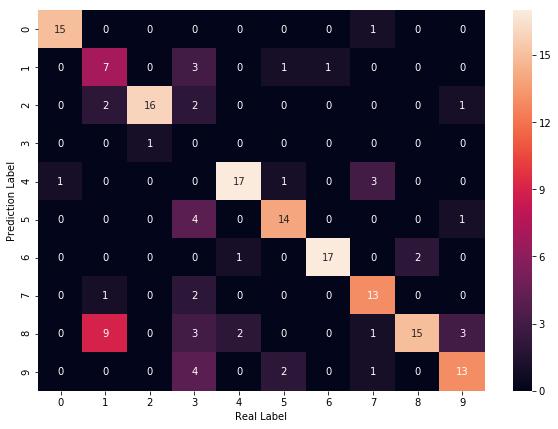

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([16., 12., 21.,  1., 22., 19., 20., 16., 33., 20.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:4 index:[5 9] real:5
#1 min_error:3 index:[2] real:2
#2 min_error:4 index:[7 8] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:2 index:[1] real:1
#5 min_error:3 index:[7] real:7
#6 min_error:3 index:[6] real:6
#7 min_error:3 index:[7] real:3
#8 min_error:2 index:[2] real:2
#9 min_error:0 index:[1] real:1
#10 min_error:4 index:[7] real:7
#11 min_error:3 index:[8] real:4
#12 min_error:3 index:[1] real:6
#13 min_error:5 index:[3 9] real:3
#14 min_error:1 index:[1] real:1
#15 min_error:3 index:[5] real:3
#16 min_error:3 index:[8] real:9
#17 min_error:2 index:[1] real:1
#18 min_error:5 index:[7 8] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:2 index:[8] real:8
#21 min_error:3 index:[4] real:4
#22 min_error:3 index:[9] real:3
#23 min_error:1 index:[1] real:1
#24 min_error:1 index:[4] real:4
#25 min_error:3 index:[0] real:0
#26 min_error:2 index:[5] real:5
#27 min_error:4 index:[2] real:3
#28 min_error:4 index:[6] real:6
#29 min_error:3 index:[9] real:9
#30 min_erro

### part 2. add more classifier

real1 ->4

In [24]:
winner_list_append = []
classes = [[1,3,8,9],[0,1,3,5,7],[0,1,5,6,7],[0,4,7,9],[1,2,6,7,8]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list_append.append(winner)

number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.52139 stdev: 0.09269
Best fitness: 0.71738 - size: (2, 13) - species 2 - id 189
Average adjusted fitness: 0.205
Mean genetic distance 2.894, standard deviation 0.463
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 8.506 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56872 stdev: 0.08525
Best fitness: 0.74954 - size: (3, 15) - species 2 - id 338
Average adjusted fitness: 0.218
Mean genetic distance 2.992, standard deviation 0.468
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.476 sec (7.991 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57025 stdev: 0.09596
Best fitness: 0.74954 - size: (3, 15) - species 1 - id 338
Average adjusted fitness: 0.200
Mean genetic distance 3.001, standard deviation 0.437
Population of 204 members in 37 species
Total extinctio

Total extinctions: 0
Generation time: 8.454 sec (7.902 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.64810 stdev: 0.08902
Best fitness: 0.80705 - size: (10, 28) - species 18 - id 3082
Average adjusted fitness: 0.243
Mean genetic distance 3.119, standard deviation 0.504
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 7.554 sec (7.930 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64587 stdev: 0.09962
Best fitness: 0.80705 - size: (10, 28) - species 18 - id 3082
Average adjusted fitness: 0.270
Mean genetic distance 3.135, standard deviation 0.509
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 7.531 sec (7.933 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65534 stdev: 0.09687
Best fitness: 0.80705 - size: (10, 28) - species 18 - id 3082
Average adjusted fitness: 0.272
Mean genetic distance 3.177, standard deviation 0.517
Popul

Population's average fitness: 0.58194 stdev: 0.06600
Best fitness: 0.71119 - size: (3, 12) - species 36 - id 793
Average adjusted fitness: 0.144
Mean genetic distance 3.121, standard deviation 0.494
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 6.481 sec (6.254 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57932 stdev: 0.06647
Best fitness: 0.71119 - size: (3, 12) - species 36 - id 793
Average adjusted fitness: 0.202
Mean genetic distance 3.111, standard deviation 0.495
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 6.669 sec (6.296 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57914 stdev: 0.06752
Best fitness: 0.71119 - size: (5, 19) - species 17 - id 1563
Average adjusted fitness: 0.165
Mean genetic distance 3.100, standard deviation 0.496
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 6.557 sec (6.394 average)

 ****** Ru

Population of 195 members in 26 species
Total extinctions: 0
Generation time: 7.699 sec (8.410 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.60903 stdev: 0.07949
Best fitness: 0.76067 - size: (7, 22) - species 36 - id 4050
Average adjusted fitness: 0.176
Mean genetic distance 3.311, standard deviation 0.567
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 7.571 sec (8.236 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.61161 stdev: 0.08135
Best fitness: 0.76067 - size: (7, 22) - species 36 - id 4050
Average adjusted fitness: 0.185
Mean genetic distance 3.300, standard deviation 0.570
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 8.037 sec (8.008 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.60786 stdev: 0.08082
Best fitness: 0.76809 - size: (8, 25) - species 36 - id 4920
Average adjusted fitness: 0.135
Mean genetic distance 

Mean genetic distance 3.215, standard deviation 0.486
Population of 187 members in 44 species
Total extinctions: 0
Generation time: 6.937 sec (6.630 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59855 stdev: 0.07795
Best fitness: 0.74150 - size: (8, 22) - species 41 - id 2032
Average adjusted fitness: 0.249
Mean genetic distance 3.212, standard deviation 0.490
Population of 210 members in 45 species
Total extinctions: 0
Generation time: 6.532 sec (6.656 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59935 stdev: 0.07538
Best fitness: 0.74150 - size: (8, 22) - species 41 - id 2032
Average adjusted fitness: 0.182
Mean genetic distance 3.217, standard deviation 0.488
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 7.373 sec (6.711 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59799 stdev: 0.07929
Best fitness: 0.74150 - size: (8, 22) - species 41 - id 2032


Population's average fitness: 0.57608 stdev: 0.09472
Best fitness: 0.80025 - size: (2, 13) - species 5 - id 197
Average adjusted fitness: 0.225
Mean genetic distance 2.986, standard deviation 0.467
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 5.974 sec (5.897 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59847 stdev: 0.10167
Best fitness: 0.80025 - size: (2, 13) - species 5 - id 197
Average adjusted fitness: 0.283
Mean genetic distance 3.001, standard deviation 0.479
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 6.106 sec (5.967 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60405 stdev: 0.09706
Best fitness: 0.80025 - size: (2, 13) - species 5 - id 197
Average adjusted fitness: 0.291
Mean genetic distance 3.021, standard deviation 0.476
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 8.153 sec (6.513 average)

 ****** Running

Mean genetic distance 3.212, standard deviation 0.510
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 7.573 sec (7.400 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67033 stdev: 0.12230
Best fitness: 0.86642 - size: (7, 22) - species 6 - id 2861
Average adjusted fitness: 0.308
Mean genetic distance 3.195, standard deviation 0.517
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.691 sec (7.369 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.66584 stdev: 0.12206
Best fitness: 0.86642 - size: (7, 22) - species 6 - id 2861
Average adjusted fitness: 0.306
Mean genetic distance 3.207, standard deviation 0.519
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 7.642 sec (7.424 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.67038 stdev: 0.12118
Best fitness: 0.86642 - size: (7, 22) - species 6 - id 2861
Ave

Mean genetic distance 3.107, standard deviation 0.471
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 6.649 sec (6.319 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60649 stdev: 0.08518
Best fitness: 0.78108 - size: (3, 13) - species 33 - id 1518
Average adjusted fitness: 0.269
Mean genetic distance 3.103, standard deviation 0.464
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 6.797 sec (6.460 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60174 stdev: 0.08428
Best fitness: 0.78108 - size: (3, 13) - species 33 - id 1518
Average adjusted fitness: 0.185
Mean genetic distance 3.106, standard deviation 0.470
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 6.891 sec (6.568 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60469 stdev: 0.08726
Best fitness: 0.78108 - size: (3, 13) - species 33 - id 1518


Mean genetic distance 3.228, standard deviation 0.494
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 7.821 sec (7.901 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.63100 stdev: 0.09937
Best fitness: 0.79592 - size: (9, 29) - species 6 - id 3451
Average adjusted fitness: 0.388
Mean genetic distance 3.233, standard deviation 0.494
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 8.052 sec (7.971 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.64125 stdev: 0.09152
Best fitness: 0.79592 - size: (9, 29) - species 6 - id 3451
Average adjusted fitness: 0.239
Mean genetic distance 3.243, standard deviation 0.506
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 7.764 sec (8.016 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.64102 stdev: 0.10042
Best fitness: 0.79592 - size: (9, 29) - species 6 - id 3451
Ave

In [25]:
appended_winner_list = winner_list + winner_list_append

In [26]:
appended_number_codes = [[1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,1,1,0],
[0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,1,1,1,0,1],
[1,0,0,1,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1],
[0,0,1,1,0,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0],
[1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0],
[0,1,0,0,1,1,0,1,1,1,0,0,0,0,1,0,1,1,0,0],
[1,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1],
[0,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1],
[1,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,0,0,0,1],
[0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,1,0,0,1,0]]

In [27]:
classes = [[0,2,4,6,8],[0,4,5,8,9],[1,3,4,6,9],[1,2,3,6,7,8,9],[1,4,5,6,7],[1,3,5,7,8],[0,3,4,7,8],[1,2,3,4,5],[0,2,5,7,9],[1,2,5,6,8],[1,2,4,7,9],[0,6,7],[0,2,3],[1,8,9],[0,2,3,4,5,6,7,8,9]] + classes



In [28]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(appended_winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [29]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(20):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(20 - np.sum(appended_number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [30]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:4 index:[5] real:5
#1 min_error:3 index:[2] real:2
#2 min_error:6 index:[7 8] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:3 index:[1] real:1
#5 min_error:4 index:[7] real:7
#6 min_error:3 index:[6] real:6
#7 min_error:6 index:[5 9] real:3
#8 min_error:3 index:[2] real:2
#9 min_error:1 index:[1] real:1
#10 min_error:5 index:[7] real:7
#11 min_error:5 index:[8] real:4
#12 min_error:5 index:[6] real:6
#13 min_error:6 index:[3] real:3
#14 min_error:3 index:[1] real:1
#15 min_error:5 index:[5] real:3
#16 min_error:5 index:[1 8] real:9
#17 min_error:4 index:[1] real:1
#18 min_error:6 index:[7] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:5 index:[5] real:8
#21 min_error:5 index:[4] real:4
#22 min_error:5 index:[9] real:3
#23 min_error:2 index:[1] real:1
#24 min_error:3 index:[4] real:4
#25 min_error:3 index:[0] real:0
#26 min_error:4 index:[5] real:5
#27 min_error:6 index:[2 3 5] real:3
#28 min_error:4 index:[6] real:6
#29 min_error:4 index:[9] real:9
#30 min_er

In [31]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
        
np.sum(list_P == digits.target[1617:])/180

0.7611111111111111

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  0  0  0  0  0  0  1  0  0]
 [ 0 12  0  4  0  1  0  1  0  0]
 [ 0  1 16  0  0  0  0  0  0  0]
 [ 0  0  1  3  0  0  0  0  0  0]
 [ 0  0  0  0 15  1  0  0  0  0]
 [ 0  0  0  5  0 15  0  0  3  1]
 [ 0  0  0  0  2  0 18  0  1  0]
 [ 1  1  0  1  1  0  0 17  1  0]
 [ 0  5  0  2  2  0  0  0 12  3]
 [ 0  0  0  3  0  1  0  0  0 14]]


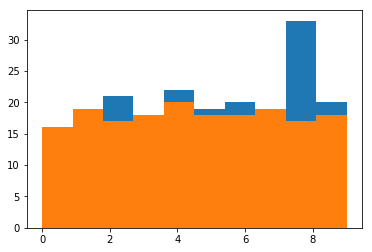

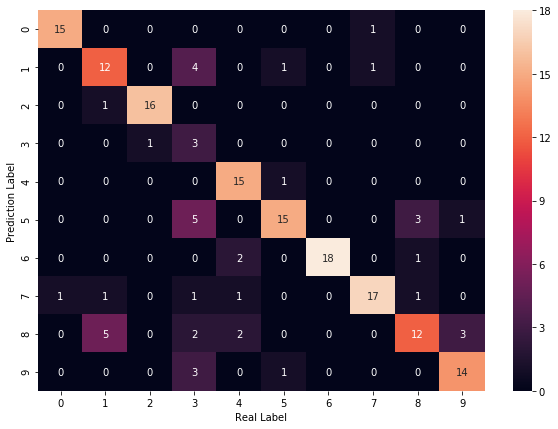

In [33]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [34]:
## 加一个confusion matrix 将容易出错的两个数字增加分类！！！！比如 8 和6 容易分错，设计一个code 将8 和6 分成两类

In [35]:
## 分别绘制15个分类器的准确率随着训练的变化，有可能ecoc 的还比他们都高哈哈哈